Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)

Data refers to client spending on different categories of a wholesale distributor

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Exploratory Analysis

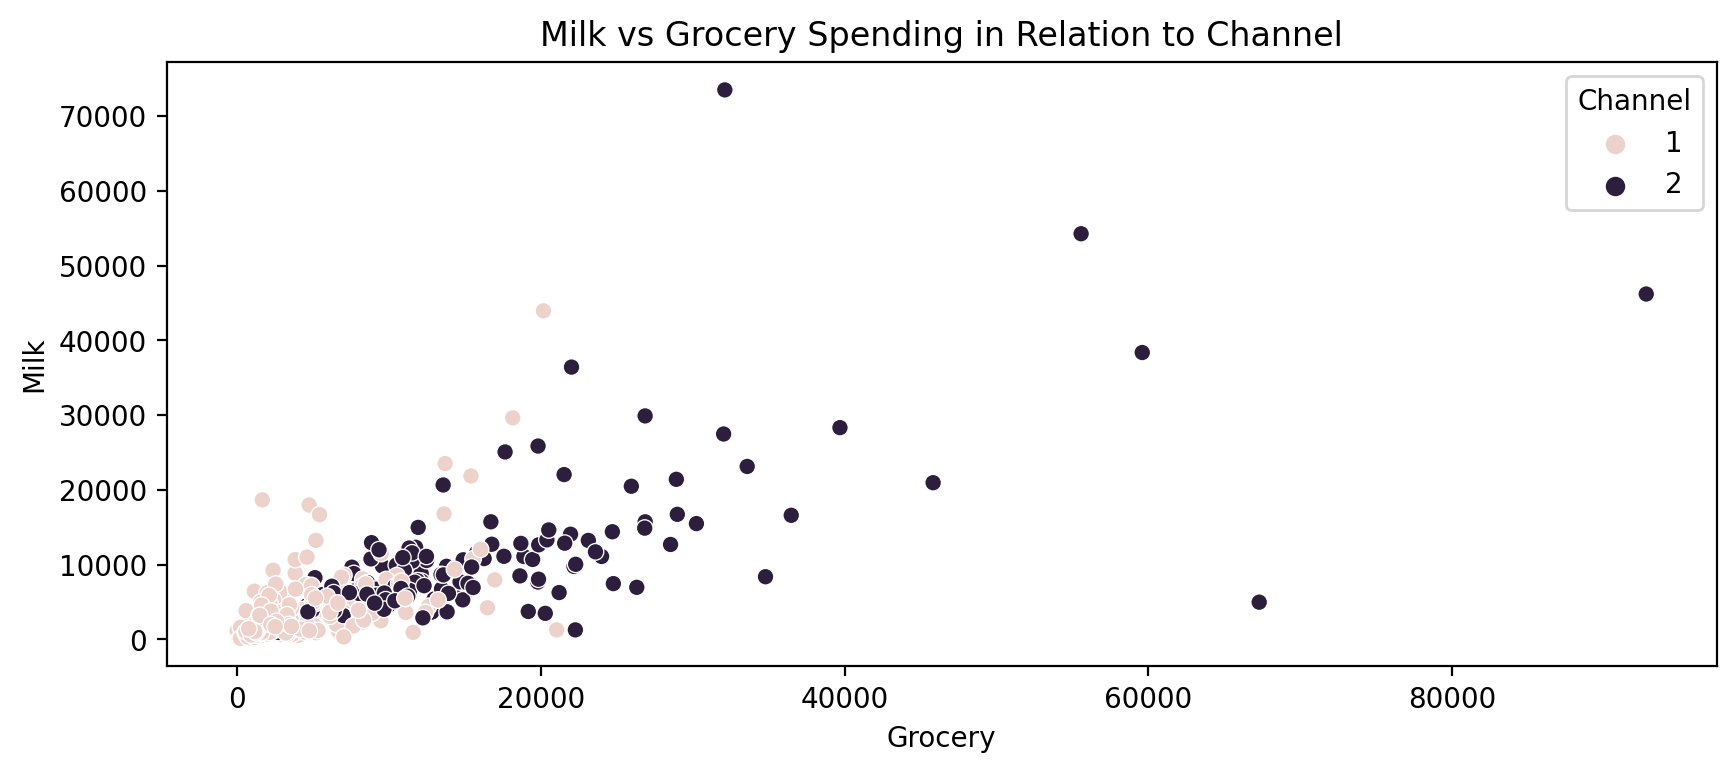

In [7]:
plt.figure(figsize=(10,4), dpi=200)
plt.title('Milk vs Grocery Spending in Relation to Channel')
sns.scatterplot(data = df, x = 'Grocery', y = 'Milk', hue='Channel');

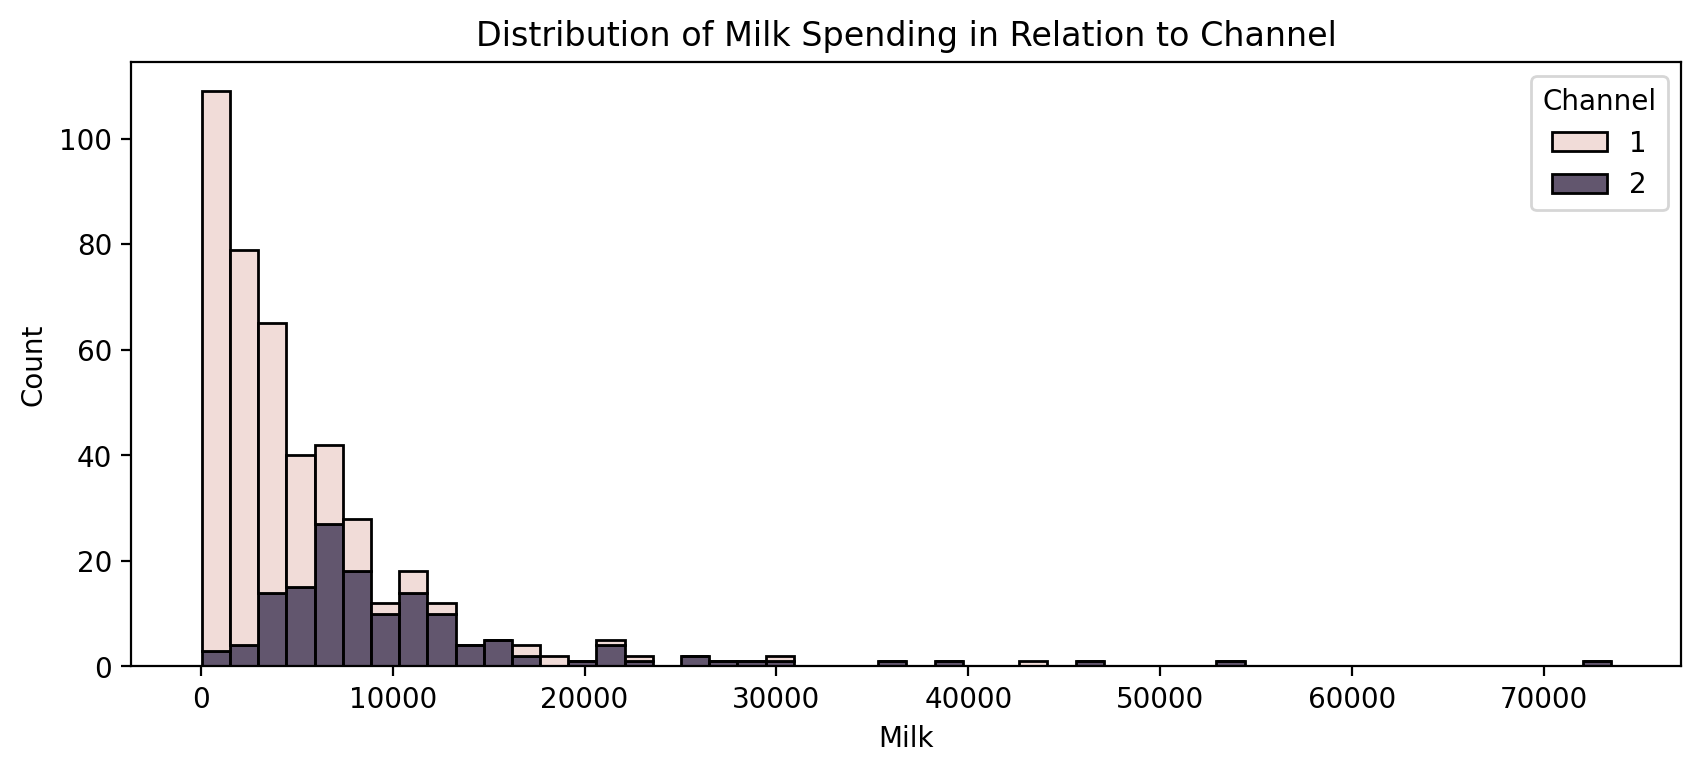

In [8]:
plt.figure(figsize=(10,4), dpi=200)
plt.title('Distribution of Milk Spending in Relation to Channel')
sns.histplot(df,x='Milk',hue='Channel',multiple="stack");

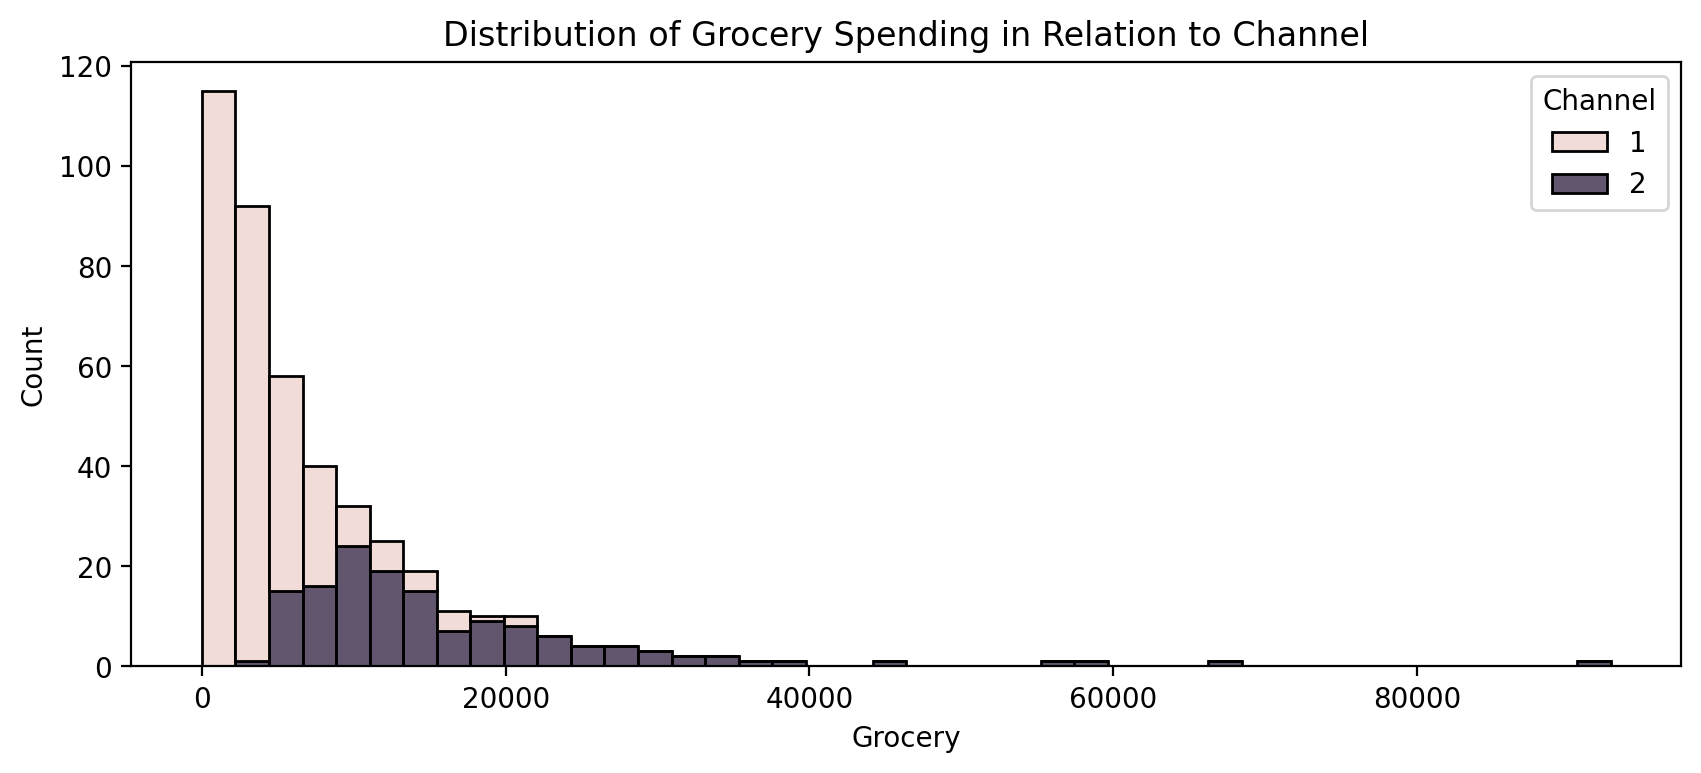

In [9]:
plt.figure(figsize=(10,4), dpi=200)
plt.title('Distribution of Grocery Spending in Relation to Channel')
sns.histplot(df,x='Grocery',hue='Channel',multiple="stack");

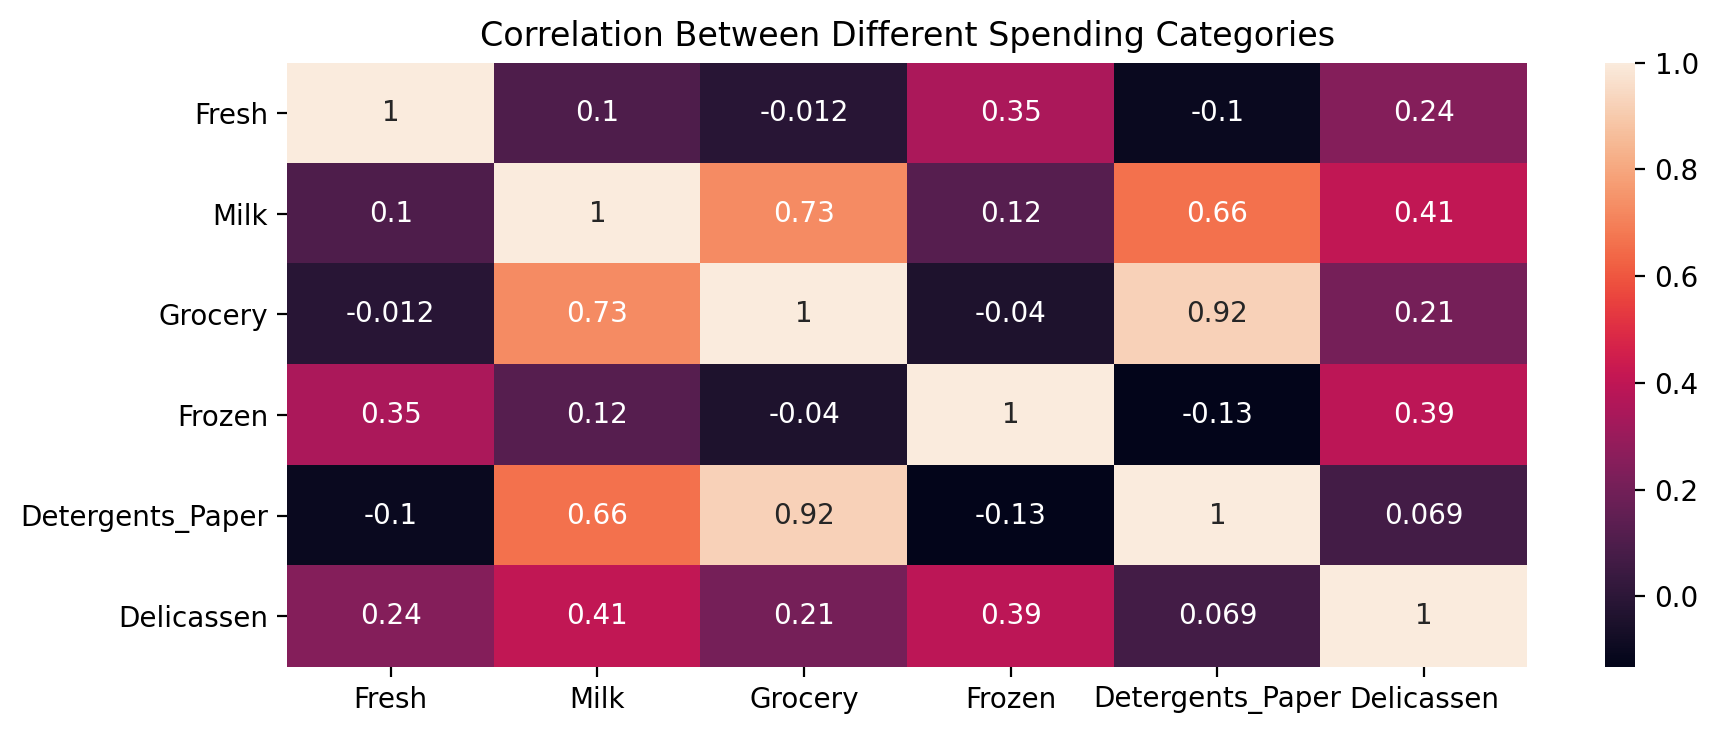

In [10]:
## heat map of Spending Correlations
plt.figure(figsize=(10,4), dpi=200)
plt.title('Correlation Between Different Spending Categories')
sns.heatmap(df.drop(['Channel', 'Region'], axis=1).corr(), annot=True);

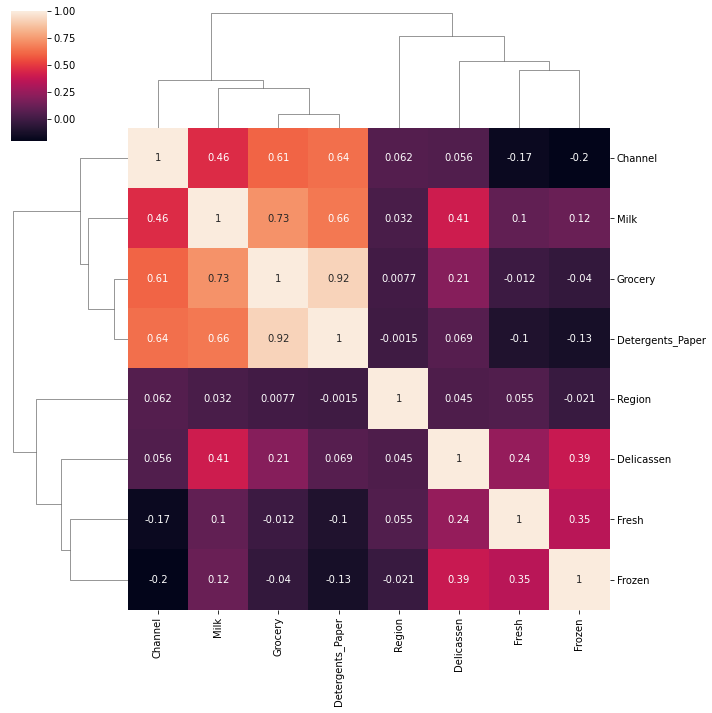

In [11]:
## Clustermap of Correlations
sns.clustermap(df.corr(), annot=True)

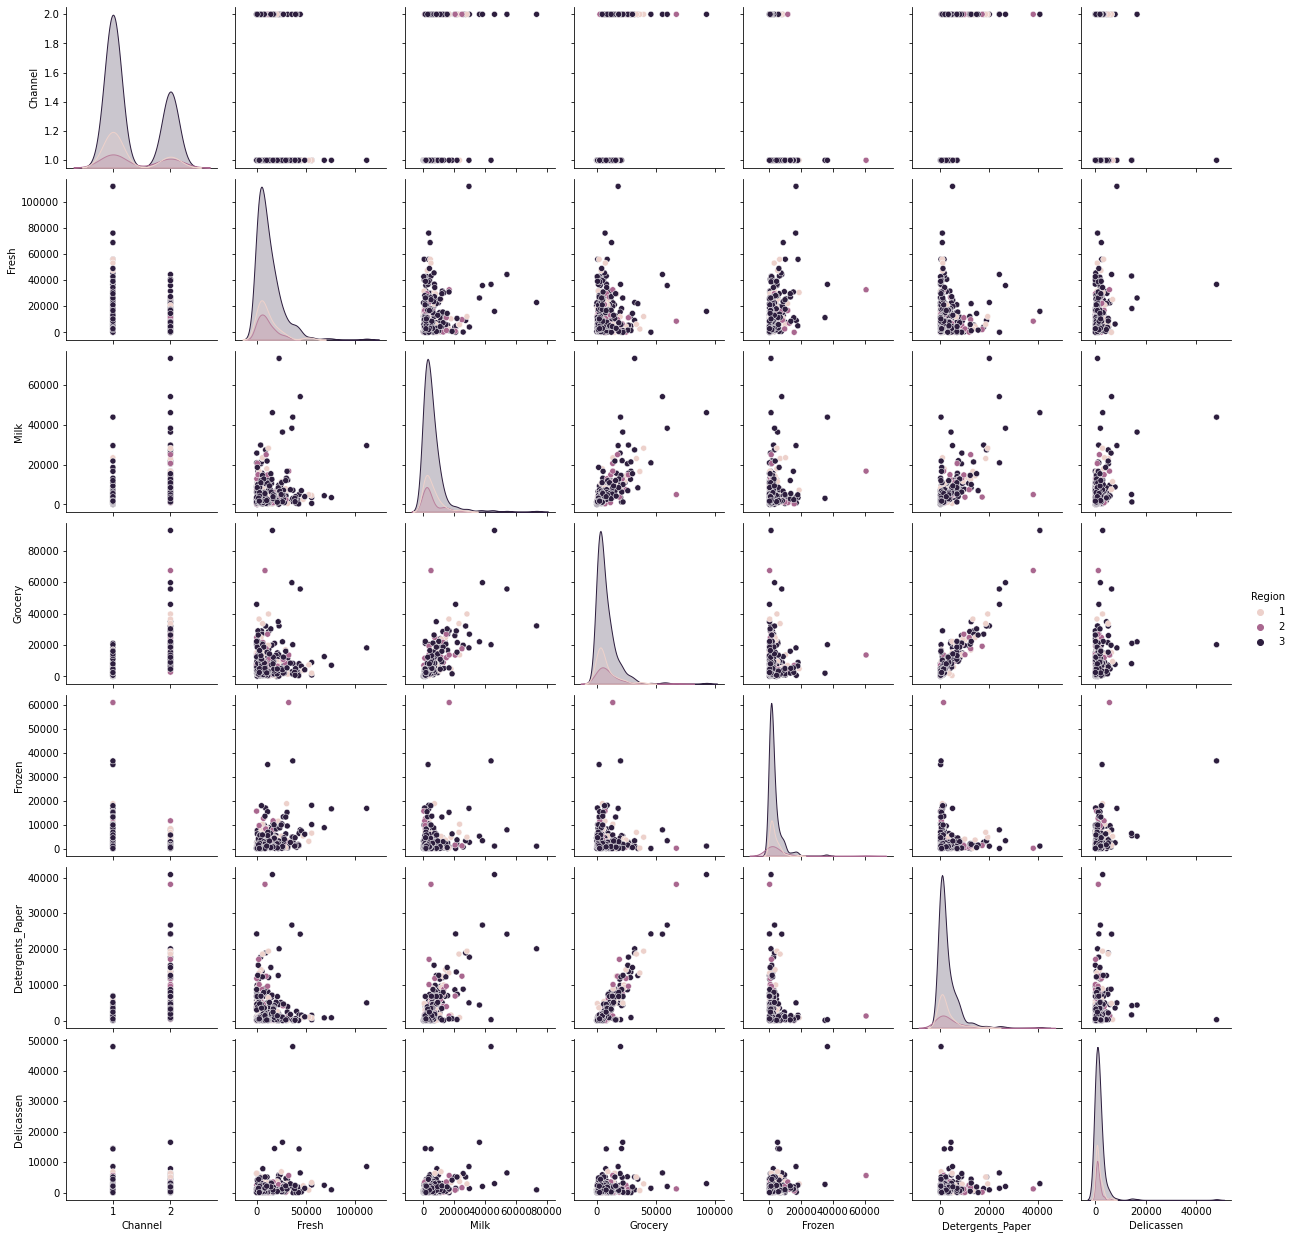

In [12]:
sns.pairplot(df,hue='Region')

## DBSCAN

### Scale Data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_df = scaler.fit_transform(df)

### Turn Scaled Data to Dataframe

In [16]:
scaled_df = pd.DataFrame(scaled_df,columns = df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### Finding Range for Optimal Epsilon

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
outlier_percent = []
number_of_outlier = []

for ep in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=ep)
    dbscan.fit(scaled_df)
    
    ## Outliers As Percent of Total Number of PTS
    outlier_percent.append(100*(np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)))

    ## Total Number of Outliers Found
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))


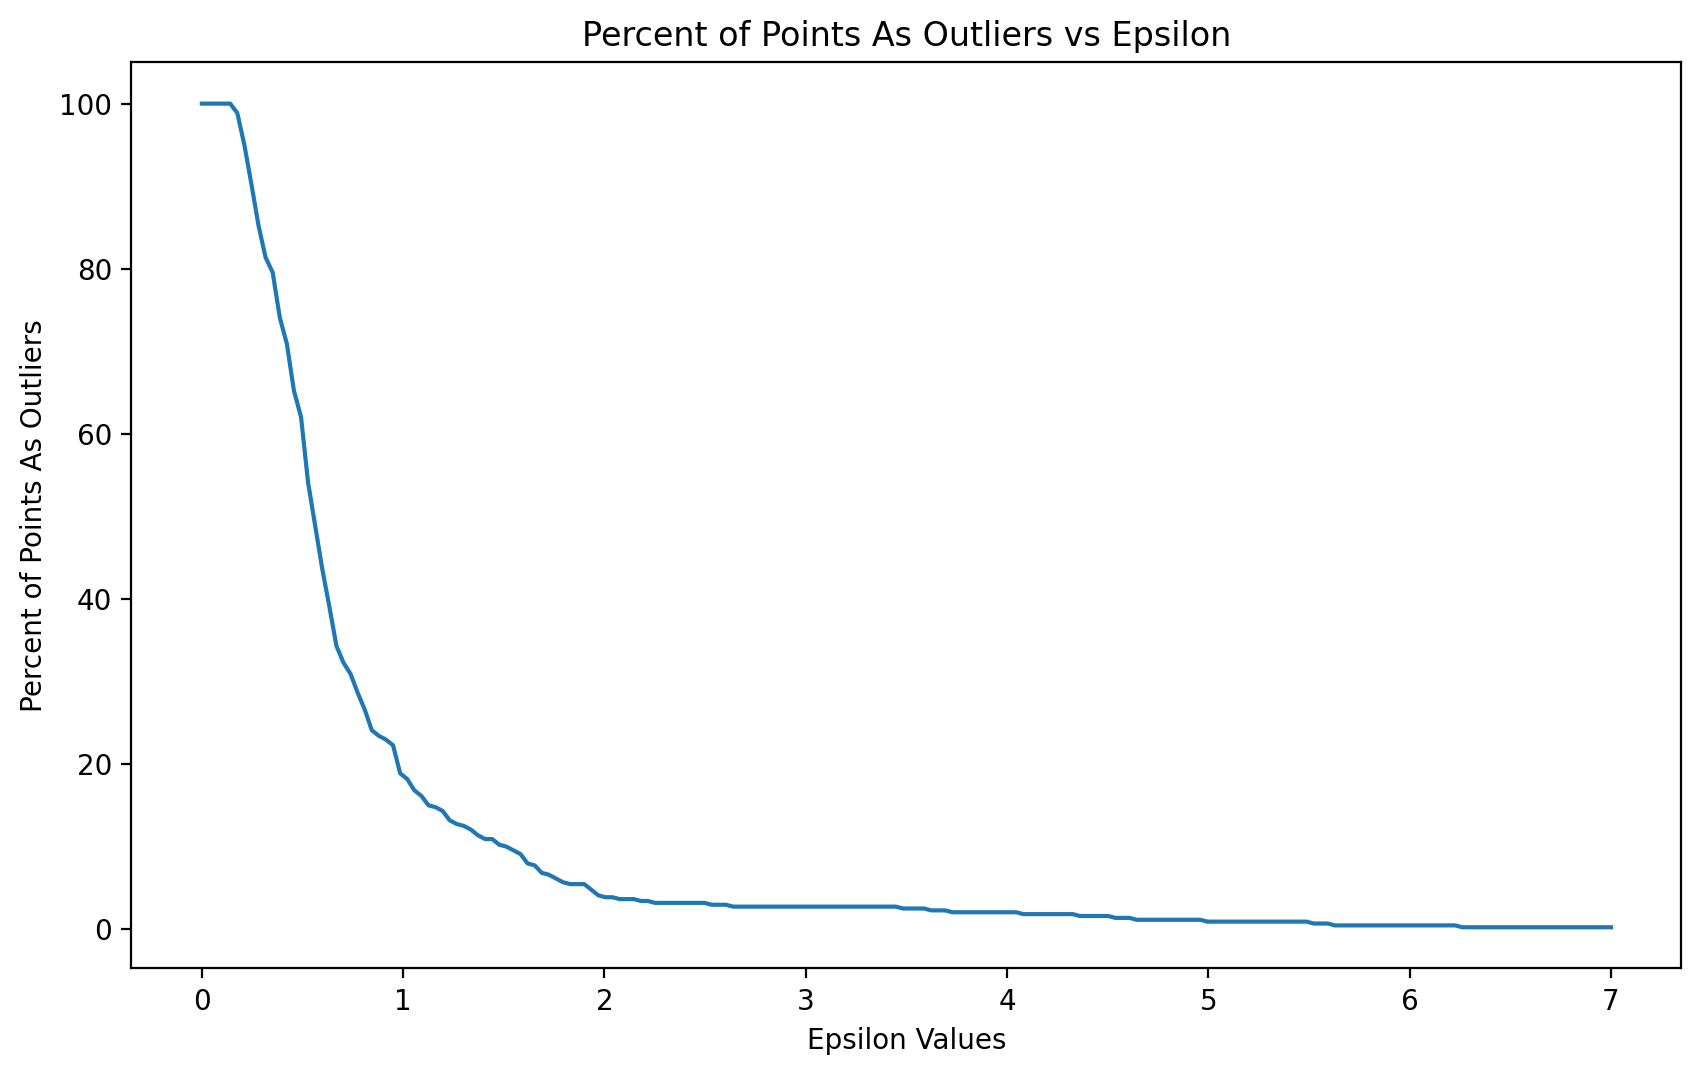

In [20]:
plt.figure(figsize=(10,6),dpi=200)
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlabel('Epsilon Values')
plt.ylabel('Percent of Points As Outliers')
plt.title('Percent of Points As Outliers vs Epsilon');

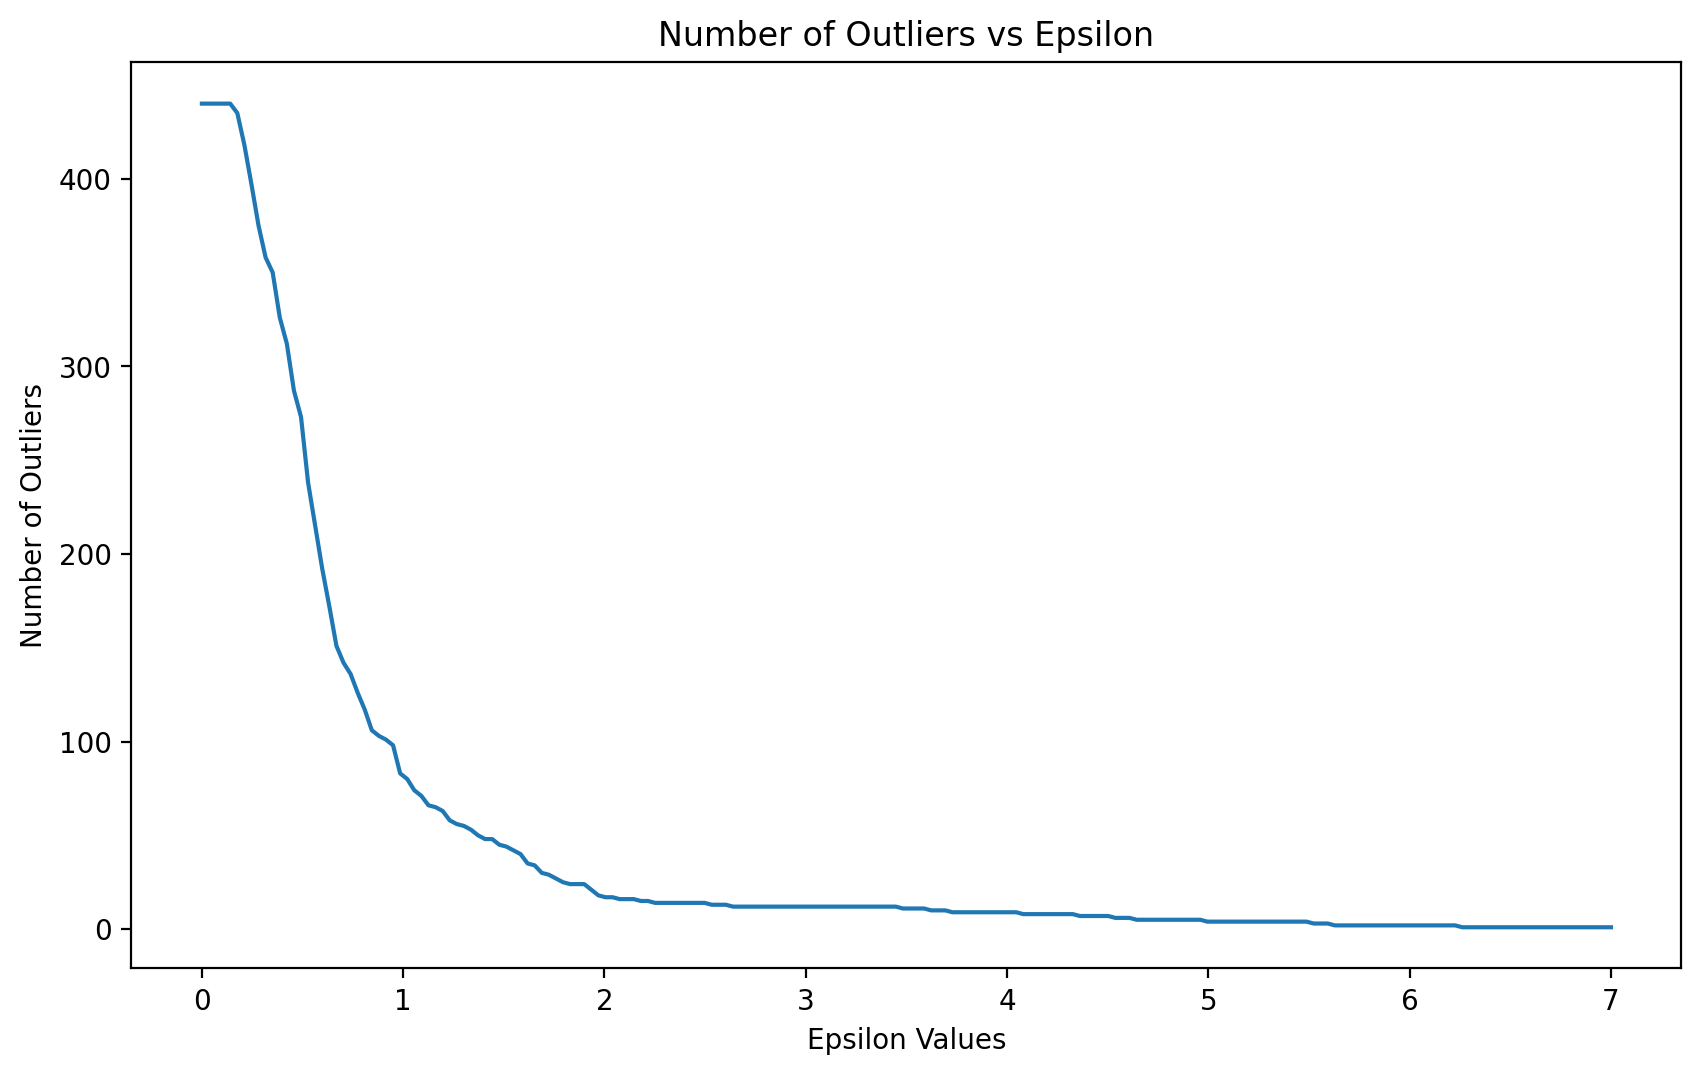

In [21]:
plt.figure(figsize=(10,6),dpi=200)
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outlier)
plt.xlabel('Epsilon Values')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers vs Epsilon');

### Based on the results above, the optimal epsilon seems to be a number between 1 and 3

### Finding Range for Optimal Min # of Samples

In [25]:
outlier_percent = []
number_of_outlier = []

for n in np.arange(1,50):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(scaled_df)
    
    ## Outliers As Percent of Total Number of PTS
    outlier_percent.append(100*(np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)))

    ## Total Number of Outliers Found
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))


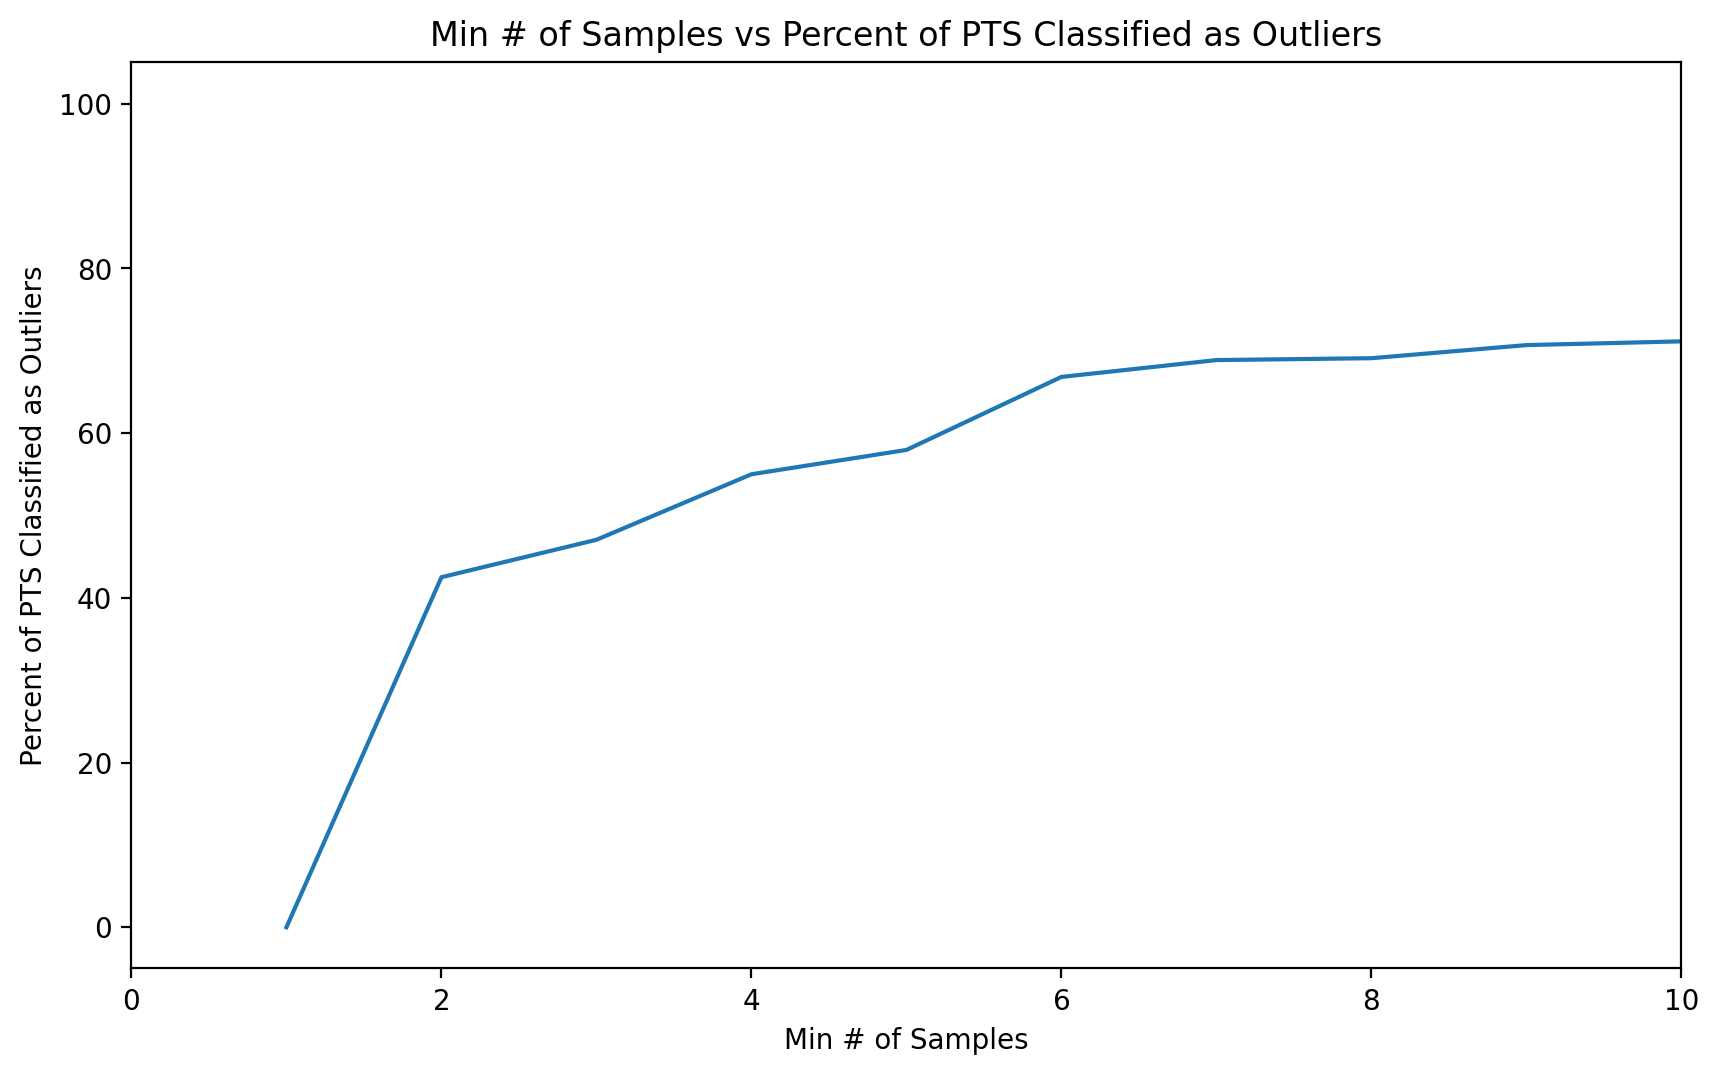

In [29]:
plt.figure(figsize=(10,6),dpi=200)
sns.lineplot(x=np.arange(1,50),y=outlier_percent)
plt.xlabel('Min # of Samples')
plt.ylabel('Percent of PTS Classified as Outliers')
plt.xlim(0,10)

plt.title('Min # of Samples vs Percent of PTS Classified as Outliers');

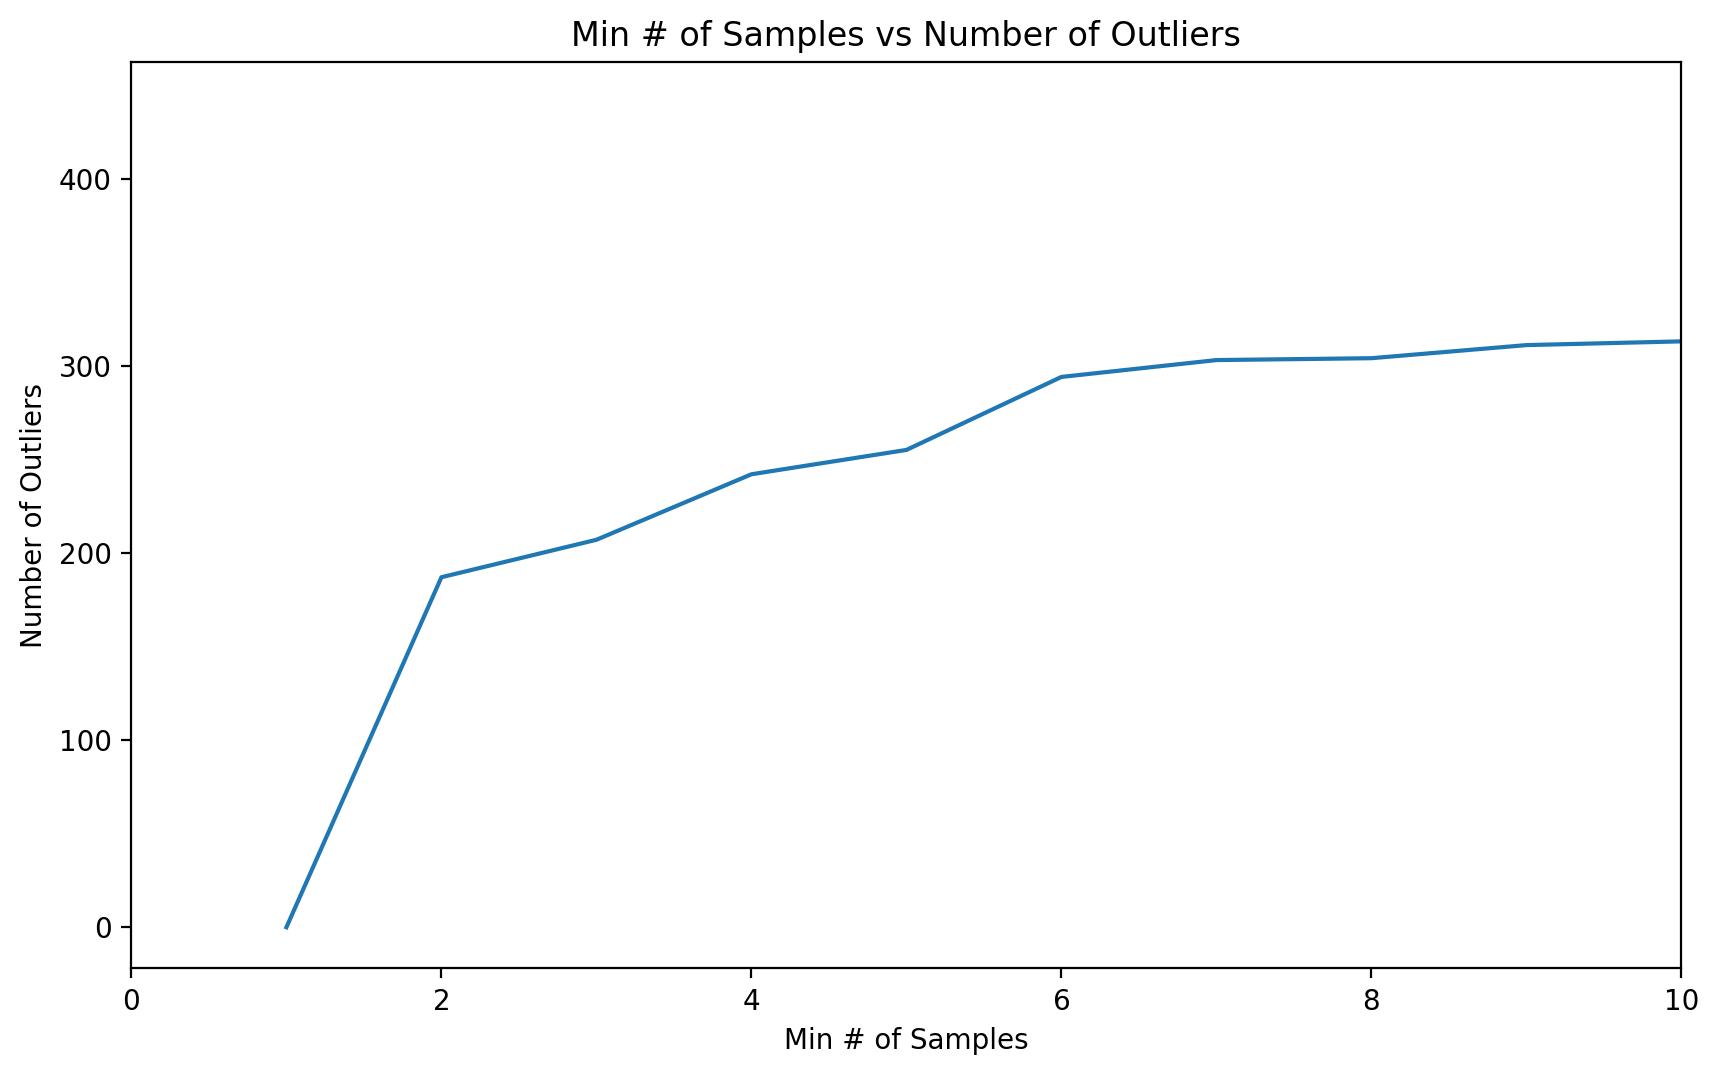

In [28]:
plt.figure(figsize=(10,6),dpi=200)
sns.lineplot(x=np.arange(1,50),y=number_of_outlier)
plt.xlabel('Min # of Samples')
plt.ylabel('Number of Outliers')
plt.xlim(0,10)
plt.title('Min # of Samples vs Number of Outliers');

### Based on results above, the optimal min # of sample should be around 1 which is not ideal. Would create too many small clusters. Thus, we will use only epsilon and use default value of 5 for min # of samples. Combined with epsilon, there will be less outliers so dont worry.

### Final Model

In [43]:
final_dbscan = DBSCAN(eps=2)

In [44]:
labels = final_dbscan.fit_predict(scaled_df)

In [45]:
df['Labels'] = labels

### Exploring Newly Created Clusters

In [46]:
## 2 Clusters Created -- 17 are outliers (about 0.3% of dataset)
## Note (-1) signifies outlier
df['Labels'].value_counts()

 1    291
 0    132
-1     17
Name: Labels, dtype: int64

In [73]:
## Overview 
df.groupby('Labels').describe().drop(['Channel','Region'],axis=1).transpose()

Labels                             -1             0             1
Fresh            count      17.000000    132.000000    291.000000
                 mean    30161.529412   8200.681818  12662.869416
                 std     28261.746611   8139.560530  11907.830203
                 min        85.000000     18.000000      3.000000
                 25%     11314.000000   2274.250000   3952.000000
                 50%     22925.000000   5474.000000   9351.000000
                 75%     36847.000000  11962.500000  17908.500000
                 max    112151.000000  40721.000000  68951.000000
Milk             count      17.000000    132.000000    291.000000
                 mean    26872.411765   8849.446970   3180.065292
                 std     20461.302760   5054.097575   3266.187940
                 min      1266.000000    928.000000     55.000000
                 25%      5025.000000   5695.000000   1126.000000
                 50%     27472.000000   7621.000000   2102.000000
                 75%     38369.000000  11097.000000   3901.000000
                 max     73498.000000  29892.000000  23527.000000
Grocery          count      17.000000    132.000000    291.000000
                 mean    33575.823529  13919.113636   3747.250859
                 std     24294.862655   6965.150819   3129.543696
                 min      2062.000000   2743.000000      3.000000
                 25%     18148.000000   9002.750000   1672.500000
                 50%     32034.000000  12007.500000   2642.000000
                 75%     45828.000000  18732.500000   4927.500000
                 max     92780.000000  36486.000000  16966.000000
Frozen           count      17.000000    132.000000    291.000000
                 mean    12380.235294   1527.174242   3228.862543
                 std     16696.849615   1669.627547   3584.178020
                 min        36.000000     33.000000     25.000000
                 25%      3232.000000    522.000000    815.500000
                 50%      5373.000000   1067.500000   1960.000000
                 75%     16538.000000   1816.750000   4365.500000
                 max     60869.000000  11559.000000  18711.000000
Detergents_Paper count      17.000000    132.000000    291.000000
                 mean    14612.294118   6037.280303    764.697595
                 std     13512.296510   3674.613913   1069.086577
                 min        71.000000    332.000000      3.000000
                 25%      1579.000000   3539.250000    182.500000
                 50%     18594.000000   5131.000000    375.000000
                 75%     24171.000000   7598.250000    853.500000
                 max     40827.000000  17740.000000   6907.000000
Delicassen       count      17.000000    132.000000    291.000000
                 mean     8185.411765   1548.310606   1125.134021
                 std     11402.374501   1424.303623   1090.157660
                 min       903.000000      3.000000      3.000000
                 25%      2017.000000    541.500000    376.500000
                 50%      5121.000000   1288.500000    790.000000
                 75%      8550.000000   2127.250000   1509.500000
                 max     47943.000000   7844.000000   6854.000000

In [78]:
## Correlations within each label
df.drop(['Channel','Region'],axis=1).groupby('Labels').corr()

Fresh      Milk   Grocery    Frozen  \
Labels                                                            
-1     Fresh             1.000000  0.023447 -0.337102  0.220347   
       Milk              0.023447  1.000000  0.407390 -0.199951   
       Grocery          -0.337102  0.407390  1.000000 -0.531105   
       Frozen            0.220347 -0.199951 -0.531105  1.000000   
       Detergents_Paper -0.419590  0.355206  0.954872 -0.613675   
       Delicassen        0.133013  0.114144 -0.292800  0.329023   
 0     Fresh             1.000000 -0.202012 -0.274620  0.160374   
       Milk             -0.202012  1.000000  0.602874 -0.065720   
       Grocery          -0.274620  0.602874  1.000000 -0.151574   
       Frozen            0.160374 -0.065720 -0.151574  1.000000   
       Detergents_Paper -0.326410  0.533582  0.797028 -0.158492   
       Delicassen        0.159291  0.176416  0.009408  0.148864   
 1     Fresh             1.000000  0.046015  0.093443  0.298522   
       Milk              0.046015  1.000000  0.545905  0.154013   
       Grocery           0.093443  0.545905  1.000000  0.067006   
       Frozen            0.298522  0.154013  0.067006  1.000000   
       Detergents_Paper -0.131936  0.264300  0.534376 -0.098960   
       Delicassen        0.248632  0.407103  0.297472  0.238381   

                         Detergents_Paper  Delicassen  
Labels                                                 
-1     Fresh                    -0.419590    0.133013  
       Milk                      0.355206    0.114144  
       Grocery                   0.954872   -0.292800  
       Frozen                   -0.613675    0.329023  
       Detergents_Paper          1.000000   -0.462318  
       Delicassen               -0.462318    1.000000  
 0     Fresh                    -0.326410    0.159291  
       Milk                      0.533582    0.176416  
       Grocery                   0.797028    0.009408  
       Frozen                   -0.158492    0.148864  
       Detergents_Paper          1.000000   -0.079049  
       Delicassen               -0.079049    1.000000  
 1     Fresh                    -0.131936    0.248632  
       Milk                      0.264300    0.407103  
       Grocery                   0.534376    0.297472  
       Frozen                   -0.098960    0.238381  
       Detergents_Paper          1.000000    0.055105  
       Delicassen                0.055105    1.000000

In [65]:
## Mean Spending Per Label for Each Category
## Scaling betweeon 0 and 1 for better comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mean_per_label = df.groupby('Labels').mean().drop(['Channel','Region'],axis=1)
new_mean_per_label = scaler.fit_transform(mean_per_label)
scaled_mean_per_label = pd.DataFrame(new_mean_per_label, mean_per_label.index,mean_per_label.columns)

In [66]:
scaled_mean_per_label

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='Labels'>

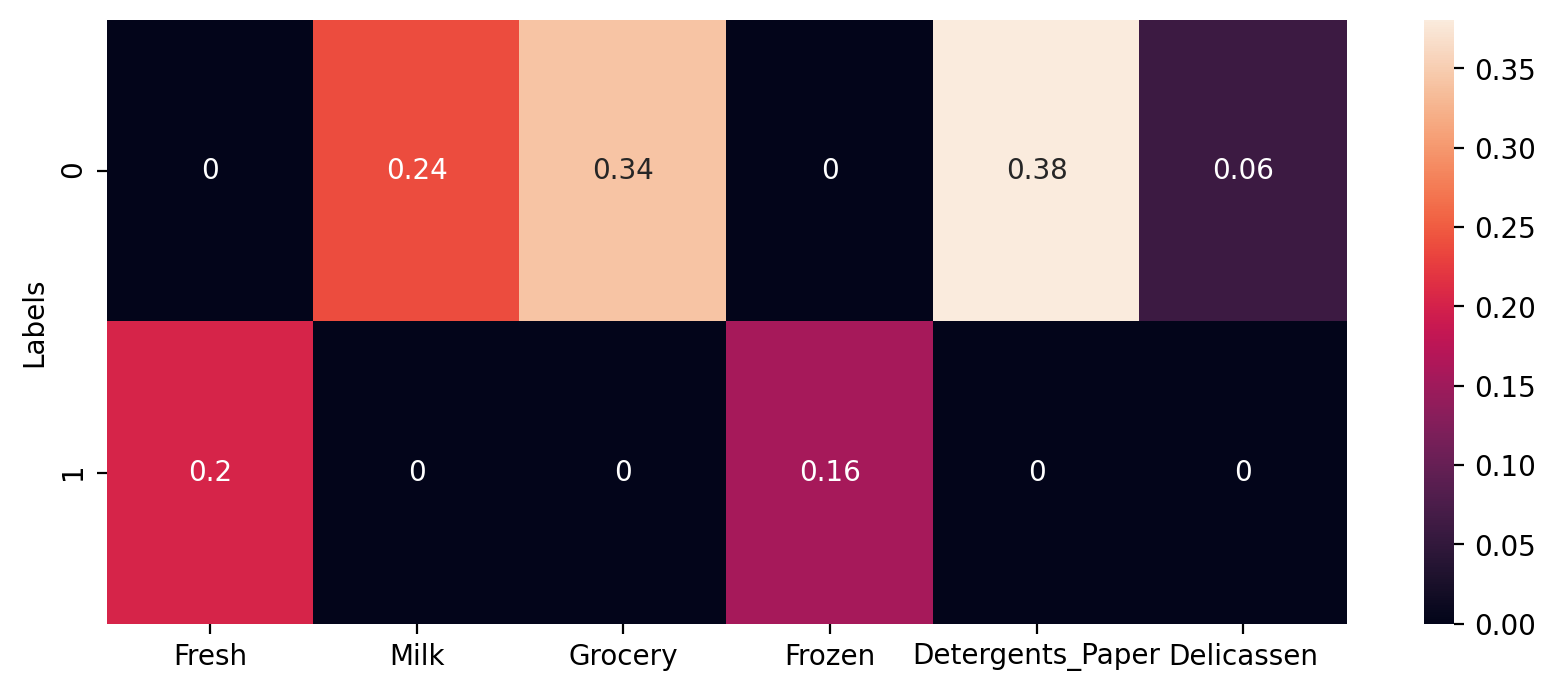

In [79]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(scaled_mean_per_label.loc[[0,1]], annot=True)

## Based on the results from the heatmap above, we see one of the significant differences in the clusters lies in Detergents Pape Spending
